## DSC630
## Week 8 solution 
## Abhishek Srivastava

## 8.2 Assignment: Time Series Modeling

You will be using the dataset us_retail_sales.csv for this assignment. This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:
Plot the data with proper labeling and make some observations on the graph.
Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
Use the training set to build a predictive model for the monthly retail sales.
Use the model to predict the monthly retail sales on the last year of data.
Report the RMSE of the model predictions on the test set.


In [23]:
# Load required libraries
import pandas as pd
import numpy as np

# Load data file
df = pd.read_csv('us_retail_sales.csv')
# Display the first few rows of the dataframe
print(df.head())
# Display the column names
print("\nColumns in the dataframe:")
print(df.columns)

   YEAR     JAN     FEB     MAR     APR     MAY     JUN       JUL       AUG  \
0  1992  146925  147223  146805  148032  149010  149800  150761.0  151067.0   
1  1993  157555  156266  154752  158979  160605  160127  162816.0  162506.0   
2  1994  167518  169649  172766  173106  172329  174241  174781.0  177295.0   
3  1995  182413  179488  181013  181686  183536  186081  185431.0  186806.0   
4  1996  189135  192266  194029  194744  196205  196136  196187.0  196218.0   

        SEP       OCT       NOV       DEC  
0  152588.0  153521.0  153583.0  155614.0  
1  163258.0  164685.0  166594.0  168161.0  
2  178787.0  180561.0  180703.0  181524.0  
3  187366.0  186565.0  189055.0  190774.0  
4  198859.0  200509.0  200174.0  201284.0  

Columns in the dataframe:
Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')


### 1. Plot the data with proper labeling and make some observations on the graph.

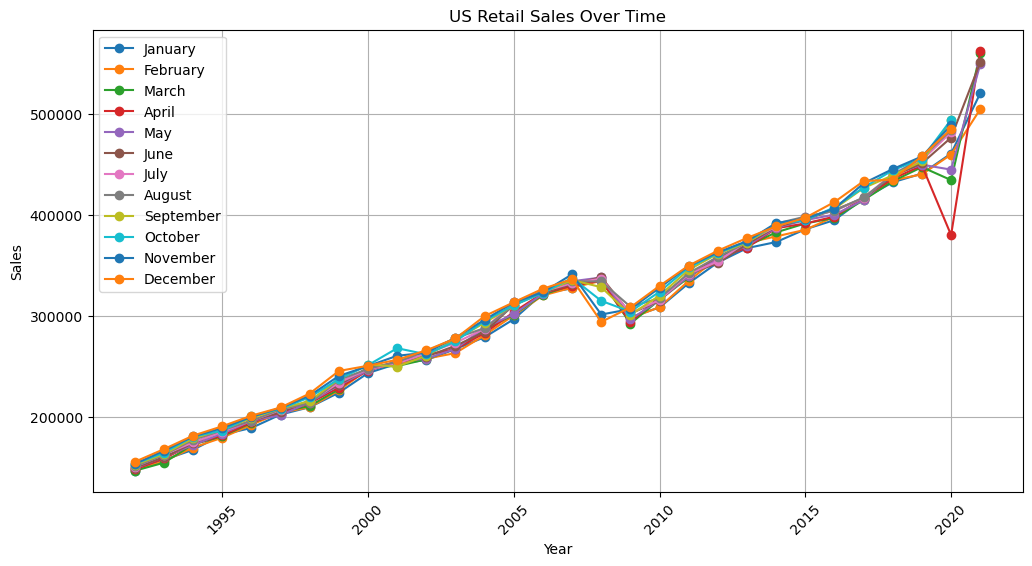

In [24]:
# Plot the data with proper labeling and make some observations on the graph where
# Columns in the dataframe:
#Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
#       'OCT', 'NOV', 'DEC'],
#      dtype='object')
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['YEAR'], df['JAN'], marker='o', label='January')
plt.plot(df['YEAR'], df['FEB'], marker='o', label='February')
plt.plot(df['YEAR'], df['MAR'], marker='o', label='March')
plt.plot(df['YEAR'], df['APR'], marker='o', label='April')
plt.plot(df['YEAR'], df['MAY'], marker='o', label='May')
plt.plot(df['YEAR'], df['JUN'], marker='o', label='June')
plt.plot(df['YEAR'], df['JUL'], marker='o', label='July')
plt.plot(df['YEAR'], df['AUG'], marker='o', label='August')
plt.plot(df['YEAR'], df['SEP'], marker='o', label='September')
plt.plot(df['YEAR'], df['OCT'], marker='o', label='October')
plt.plot(df['YEAR'], df['NOV'], marker='o', label='November')
plt.plot(df['YEAR'], df['DEC'], marker='o', label='December')
plt.title('US Retail Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()


### 2. Some observations on the graph

- US retail sales mostly go up from the early 1990s to 2007. Sales get bigger every year for all months.
- There is a clear drop in sales around 2008 and 2009. This happened because of the global financial crisis, which hurt the economy everywhere.
- After that, sales start growing again and keep rising until about 2019. The economy gets better and people spend more.
- There is a very large drop in 2020, mostly in March and April. This lines up with the start of the COVID-19 pandemic, when stores closed and people stayed home.
- Sales quickly go back up at the end of 2020 and in 2021, reaching the highest levels ever. This happens as stores reopen and the government helps people with stimulus money.
- Sales are highest every December, which is the holiday season when people buy a lot. Sales are lowest in January and February, just after the holidays.
- Even though there are a few drops, US retail sales mostly keep rising over time. This shows that retail business in the US is strong and can recover from problems.



### 3. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [25]:
# Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) 
# of data as your test set and the rest as your training set.
# # Columns in the dataframe:
#Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
#       'OCT', 'NOV', 'DEC'],
#      dtype='object')

# First, we need to reshape the dataframe to have a 'MONTH' column
df = df.melt(id_vars=['YEAR'], var_name='MONTH', value_name='SALES')
# Create a 'YYYYMM' column for easier filtering
# Cast value to numeric for df['YYYYMM']
df['YYYYMM'] = df['YEAR'].astype(str) + df['MONTH'].map({
    'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUN': '06',
    'JUL': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'
})
df['YYYYMM'] = pd.to_numeric(df['YYYYMM'])
# Define the test set period
test_start = 202007
test_end = 202106
# Split the data
train_df = df[(df['YYYYMM'] < test_start)]
test_df = df[(df['YYYYMM'] >= test_start) & (df['YYYYMM'] <= test_end)]

### 4. Use the training set to build a predictive model for the monthly retail sales

In [26]:
# Use whole training set to build a predictive model for the monthly retail sales
from sklearn.linear_model import LinearRegression
# Prepare the data for modeling
X_train = train_df[['YYYYMM']]
y_train = train_df['SALES']
# Build the model
model = LinearRegression()
model.fit(X_train, y_train)
# Display model coefficients
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")
    

Model Coefficients:
Intercept: -20697841.76585196
Coefficient: [104.68329077]


### 5. Use the model to predict the monthly retail sales on the last year of data


Predicted vs Actual Sales:
Month: 202101, Predicted Sales: 458755.98, Actual Sales: 520162.00
Month: 202102, Predicted Sales: 458860.67, Actual Sales: 504458.00
Month: 202103, Predicted Sales: 458965.35, Actual Sales: 559871.00
Month: 202104, Predicted Sales: 459070.03, Actual Sales: 562269.00
Month: 202105, Predicted Sales: 459174.72, Actual Sales: 548987.00
Month: 202106, Predicted Sales: 459279.40, Actual Sales: 550782.00
Month: 202007, Predicted Sales: 448915.75, Actual Sales: 481627.00
Month: 202008, Predicted Sales: 449020.44, Actual Sales: 483716.00
Month: 202009, Predicted Sales: 449125.12, Actual Sales: 493327.00
Month: 202010, Predicted Sales: 449229.80, Actual Sales: 493991.00
Month: 202011, Predicted Sales: 449334.49, Actual Sales: 488652.00
Month: 202012, Predicted Sales: 449439.17, Actual Sales: 484782.00


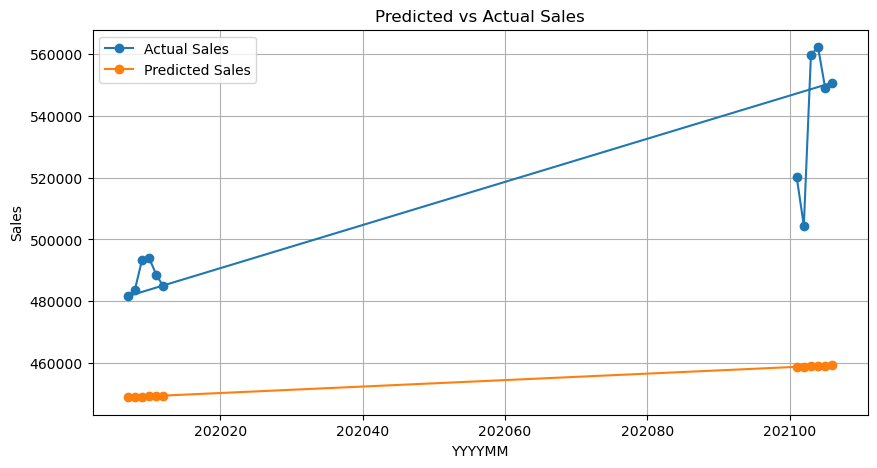

In [27]:
# Prepare the test labels (actual sales)
y_test = test_df['SALES']
X_test = test_df[['YYYYMM']]
# Predict the sales on the test set
y_pred = model.predict(X_test)

# Display the predicted vs actual sales for each test month
print("\nPredicted vs Actual Sales:")
for i in range(len(X_test)):
    print(f"Month: {X_test.iloc[i]['YYYYMM']}, Predicted Sales: {y_pred[i]:.2f}, Actual Sales: {y_test.iloc[i]:.2f}")

# Optionally plot predicted vs actual for visual comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(X_test['YYYYMM'], y_test, marker='o', label='Actual Sales')
plt.plot(X_test['YYYYMM'], y_pred, marker='o', label='Predicted Sales')
plt.xlabel('YYYYMM')
plt.ylabel('Sales')
plt.title('Predicted vs Actual Sales')
plt.legend()
plt.grid()
plt.show()


In [28]:
# Report the RMSE of the model predictions on the test set.
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_df['SALES'], y_pred))
print(f"\nRoot Mean Squared Error (RMSE) on Test Set: {rmse:.2f}")


Root Mean Squared Error (RMSE) on Test Set: 65920.99
